In [2]:
import glob 
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
# img_dir='/Users/yeshwanth/Documents/DL/project1/part-1/sara_Yeshwanth'
img_dir="train"
valid_dir="valid"
from sklearn.preprocessing import StandardScaler
data_dir = pathlib.Path(img_dir).with_suffix('')







In [21]:
class DeepLearning:
    def __init__(self,batch_size=32,height=224,width=224,epochs=25):
        self.batch_size=batch_size
        self.height=height
        self.width=width
        self.epochs=epochs
    def getTrainAndvalidationDataSet(self,data_dir,valid_dir,img_height,img_width,batch_size):
        train_ds = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        # validation_split=0.01,
        # subset="training",
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size)
        
        val_ds = tf.keras.utils.image_dataset_from_directory(
        valid_dir,
        # validation_split=0.01,
        # subset="validation",
        seed=123,
        image_size=(img_height, img_width),
        batch_size=batch_size)
        return train_ds,val_ds
    def getStates(self,train_ds):
      class_names = train_ds.class_names
      return class_names
    def create_model(self,data_augmentation=True, dropout_rate=0.1, use_batch_norm=True,
                 use_inception=False, use_residual=False, num_classes=10, input_shape=(224, 224, 3)):

        inputs = keras.Input(shape=input_shape)
        # Data augmentation (if specified)
        if data_augmentation:
            data_augmentation_layer = keras.Sequential([
                layers.RandomFlip("horizontal"),
                layers.RandomRotation(0.2),
                layers.RandomContrast(factor=0.1),
                layers.GaussianNoise(stddev=0.01)
            ])
            x = data_augmentation_layer(inputs)
        else:
            x = inputs
        # Initial rescaling and convolutional layer
        x = layers.Rescaling(1. / 255)(x)
        x = layers.Conv2D(16, 3, padding='same', activation='relu')(x)
        # Repeated convolutional blocks (adjust number of blocks, filters, etc. as needed)
        for _ in range(3):
            if use_inception  and _==0:  # Use Inception module
                # Implement Inception module structure as suggested
                branch1 = layers.Conv2D(filters=16, kernel_size=1, padding='same', activation='relu')(x)
                branch2 = layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu')(x)
                branch3 = layers.Conv2D(filters=24, kernel_size=3, padding='same', activation='relu')(x)
                x = layers.concatenate([branch1, branch2, branch3], axis=3)



            else:  # Standard Conv2D blocks
                x = layers.Conv2D(32, 3, padding='same', activation='relu')(x)
                if use_batch_norm:
                    x = layers.BatchNormalization()(x)
                if dropout_rate > 0:
                    x = layers.Dropout(dropout_rate)(x)
                x = layers.MaxPooling2D(pool_size=(2, 2))(x)
                if use_residual:  # Add residual connection
                    residual = layers.Conv2D(filters=x.shape[-1], kernel_size=1, padding='same')(x)
                    x = layers.add([x, residual])
        # Flatten and dense layers
        x = layers.Flatten()(x)
        x = layers.Dense(128, activation='relu')(x)
        if dropout_rate > 0:
            x = layers.Dropout(dropout_rate)(x)
        outputs = layers.Dense(num_classes, activation='softmax')(x)
        model = keras.Model(inputs=inputs, outputs=outputs)
        return model
    
    def compileModel(self,model,train_ds,val_ds):
        model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
        
        history = model.fit(
                train_ds,
                validation_data=val_ds,
                epochs=self.epochs
        )
                
        model.save("dlTrained_model.h5")
        return history
    def plotgraph(self,history):
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        epochs_range = range(self.epochs)
        plt.figure(figsize=(8, 8))
        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, acc, label='Training Accuracy')
        plt.plot(epochs_range, val_acc, label='Validation Accuracy')
        plt.legend(loc='lower right')
        plt.title('Training and Validation Accuracy')
        plt.subplot(1, 2, 2)
        plt.plot(epochs_range, loss, label='Training Loss')
        plt.plot(epochs_range, val_loss, label='Validation Loss')
        plt.legend(loc='upper right')
        plt.title('Training and Validation Loss')
        plt.show()
        
    def train(self,data_dir,valid_dir,isInception,isBatchNormalisation,isAugmentation,isResidual,droprate=0.1):
        train_ds,val_ds=self.getTrainAndvalidationDataSet(data_dir,valid_dir,self.height,self.width,64)
        class_names=self.getStates(train_ds)
        print(class_names)
        numberOfClasses = len(class_names)
        model=self.create_model(data_augmentation=isAugmentation,dropout_rate=droprate,use_inception=isInception,use_batch_norm=isBatchNormalisation,num_classes=numberOfClasses,use_residual=isResidual)
        history=self.compileModel(model,train_ds,val_ds)
        loss, accuracy = model.evaluate(val_ds)
        print("Test Accuracy:", accuracy)
        print("Test Loss:", loss)
        self.plotgraph(history)
        


Found 7213 files belonging to 11 classes.
Found 1543 files belonging to 11 classes.
['creamy_paste', 'diced', 'floured', 'grated', 'juiced', 'jullienne', 'mixed', 'other', 'peeled', 'sliced', 'whole']
Epoch 1/30
113/113 [==============================] - 320s 3s/step - loss: 2.2969 - accuracy: 0.1619 - val_loss: 2.2151 - val_accuracy: 0.1918
Epoch 2/30
113/113 [==============================] - 278s 2s/step - loss: 2.1737 - accuracy: 0.2064 - val_loss: 2.1301 - val_accuracy: 0.2327
Epoch 3/30
113/113 [==============================] - 203s 2s/step - loss: 2.1003 - accuracy: 0.2315 - val_loss: 2.0733 - val_accuracy: 0.2683
Epoch 4/30
113/113 [==============================] - 211s 2s/step - loss: 2.0587 - accuracy: 0.2595 - val_loss: 2.0287 - val_accuracy: 0.2748
Epoch 5/30
113/113 [==============================] - 206s 2s/step - loss: 1.9960 - accuracy: 0.2823 - val_loss: 2.0133 - val_accuracy: 0.2839
Epoch 6/30
113/113 [==============================] - 208s 2s/step - loss: 1.9141 - 

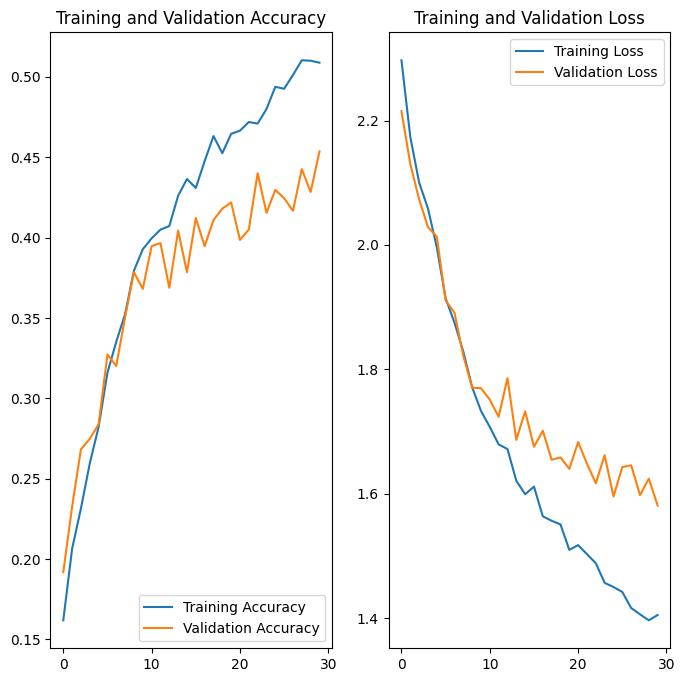

In [25]:
#with Augmentation
s=DeepLearning(epochs=30)
s.train(data_dir,valid_dir,isInception=False,isBatchNormalisation=False,isAugmentation=True,isResidual=False)

Found 7213 files belonging to 11 classes.
Found 1543 files belonging to 11 classes.
['creamy_paste', 'diced', 'floured', 'grated', 'juiced', 'jullienne', 'mixed', 'other', 'peeled', 'sliced', 'whole']
Epoch 1/25
113/113 [==============================] - 381s 3s/step - loss: 3.0212 - accuracy: 0.1170 - val_loss: 12.0159 - val_accuracy: 0.0940
Epoch 2/25
113/113 [==============================] - 385s 3s/step - loss: 2.3863 - accuracy: 0.1231 - val_loss: 4.0811 - val_accuracy: 0.1231
Epoch 3/25
113/113 [==============================] - 387s 3s/step - loss: 2.3873 - accuracy: 0.1298 - val_loss: 3.4823 - val_accuracy: 0.1154
Epoch 4/25
113/113 [==============================] - 372s 3s/step - loss: 2.3826 - accuracy: 0.1313 - val_loss: 4.0505 - val_accuracy: 0.1147
Epoch 5/25
113/113 [==============================] - 3733s 33s/step - loss: 2.3794 - accuracy: 0.1318 - val_loss: 2.6472 - val_accuracy: 0.1329
Epoch 6/25
113/113 [==============================] - 372s 3s/step - loss: 2.3787

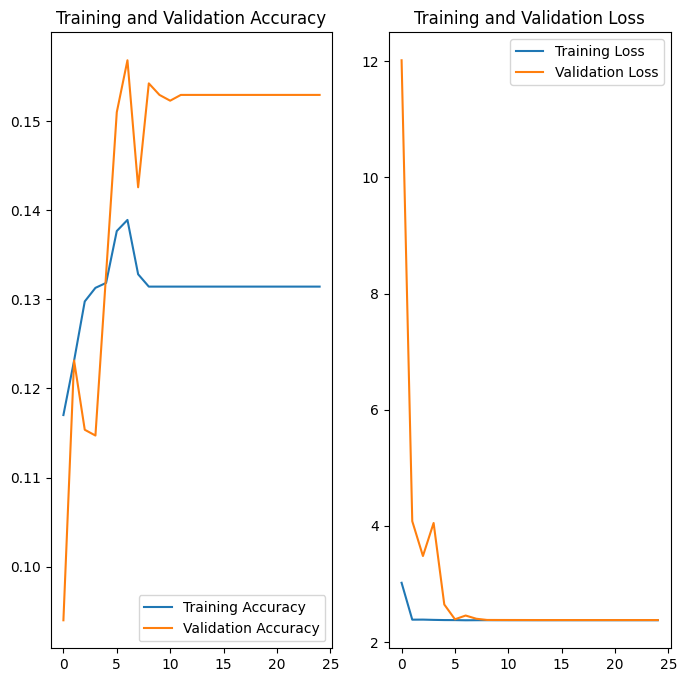

In [11]:
#with batch normalisation
s=DeepLearning()
s.train(data_dir,valid_dir,isInception=False,isBatchNormalisation=True,isAugmentation=False,isResidual=False)

Found 7213 files belonging to 11 classes.
Found 1543 files belonging to 11 classes.
['creamy_paste', 'diced', 'floured', 'grated', 'juiced', 'jullienne', 'mixed', 'other', 'peeled', 'sliced', 'whole']
Epoch 1/25
113/113 [==============================] - 423s 4s/step - loss: 2.4715 - accuracy: 0.1270 - val_loss: 2.3212 - val_accuracy: 0.1141
Epoch 2/25
113/113 [==============================] - 1914s 17s/step - loss: 2.2430 - accuracy: 0.1741 - val_loss: 2.1964 - val_accuracy: 0.2054
Epoch 3/25
113/113 [==============================] - 415s 4s/step - loss: 2.1431 - accuracy: 0.2246 - val_loss: 2.1124 - val_accuracy: 0.2528
Epoch 4/25
113/113 [==============================] - 403s 4s/step - loss: 2.1044 - accuracy: 0.2380 - val_loss: 2.1117 - val_accuracy: 0.2495
Epoch 5/25
113/113 [==============================] - 395s 3s/step - loss: 2.0403 - accuracy: 0.2595 - val_loss: 2.0449 - val_accuracy: 0.2599
Epoch 6/25
113/113 [==============================] - 396s 3s/step - loss: 2.0036 

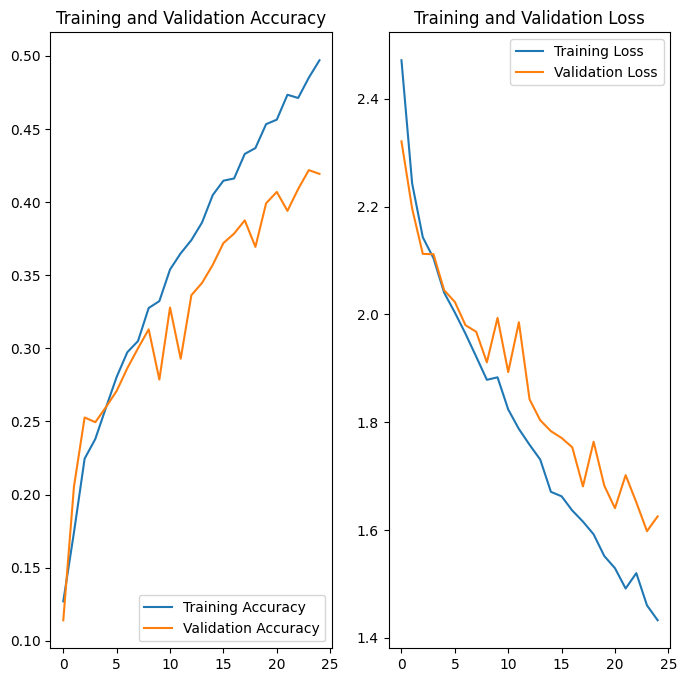

In [12]:
# with residual
s=DeepLearning()
s.train(data_dir,valid_dir,isInception=False,isBatchNormalisation=False,isAugmentation=True,isResidual=True)

Found 7213 files belonging to 11 classes.
Found 1543 files belonging to 11 classes.
['creamy_paste', 'diced', 'floured', 'grated', 'juiced', 'jullienne', 'mixed', 'other', 'peeled', 'sliced', 'whole']
Epoch 1/5
113/113 [==============================] - 1031s 9s/step - loss: 2.4033 - accuracy: 0.1611 - val_loss: 2.2244 - val_accuracy: 0.2035
Epoch 2/5
113/113 [==============================] - 894s 8s/step - loss: 2.1852 - accuracy: 0.2068 - val_loss: 2.1607 - val_accuracy: 0.2223
Epoch 3/5
113/113 [==============================] - 956s 8s/step - loss: 2.1229 - accuracy: 0.2349 - val_loss: 2.0979 - val_accuracy: 0.2586
Epoch 4/5
113/113 [==============================] - 965s 9s/step - loss: 2.0689 - accuracy: 0.2537 - val_loss: 2.0291 - val_accuracy: 0.2865
Epoch 5/5
25/25 [==============================] - 37s 1s/step - loss: 2.0094 - accuracy: 0.2890
Test Accuracy: 0.2890473008155823
Test Loss: 2.0094475746154785


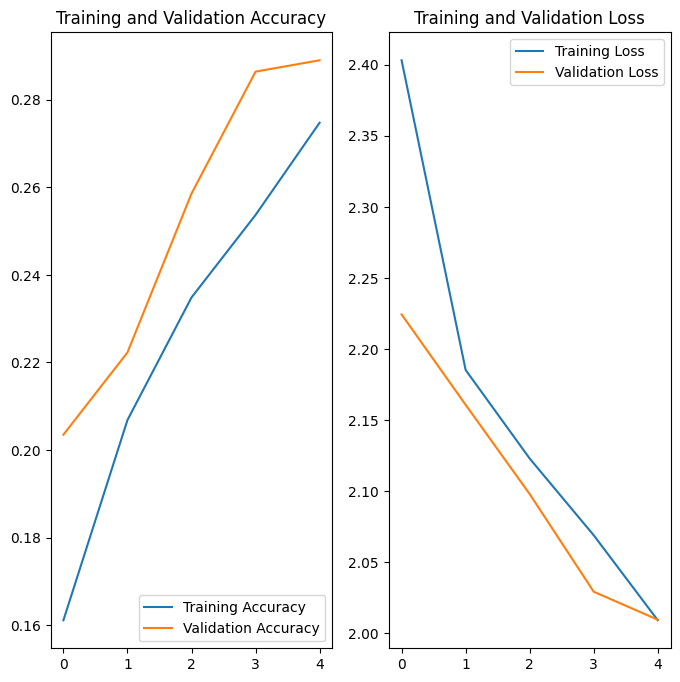

In [23]:
#with inception
s=DeepLearning(epochs=5)
s.train(data_dir,valid_dir,isInception=True,isBatchNormalisation=False,isAugmentation=True,isResidual=False,droprate=0.1)

Found 7213 files belonging to 11 classes.
Found 1543 files belonging to 11 classes.
['creamy_paste', 'diced', 'floured', 'grated', 'juiced', 'jullienne', 'mixed', 'other', 'peeled', 'sliced', 'whole']
Epoch 1/30
113/113 [==============================] - 361s 3s/step - loss: 2.3344 - accuracy: 0.1619 - val_loss: 2.2590 - val_accuracy: 0.1789
Epoch 2/30
113/113 [==============================] - 414s 4s/step - loss: 2.1993 - accuracy: 0.1956 - val_loss: 2.2045 - val_accuracy: 0.2100
Epoch 3/30
113/113 [==============================] - 356s 3s/step - loss: 2.1106 - accuracy: 0.2375 - val_loss: 2.0929 - val_accuracy: 0.2735
Epoch 4/30
113/113 [==============================] - 1358s 12s/step - loss: 2.0638 - accuracy: 0.2568 - val_loss: 2.0678 - val_accuracy: 0.2651
Epoch 5/30
113/113 [==============================] - 455s 4s/step - loss: 2.0063 - accuracy: 0.2807 - val_loss: 1.9932 - val_accuracy: 0.3033
Epoch 6/30
113/113 [==============================] - 929s 8s/step - loss: 1.9540 

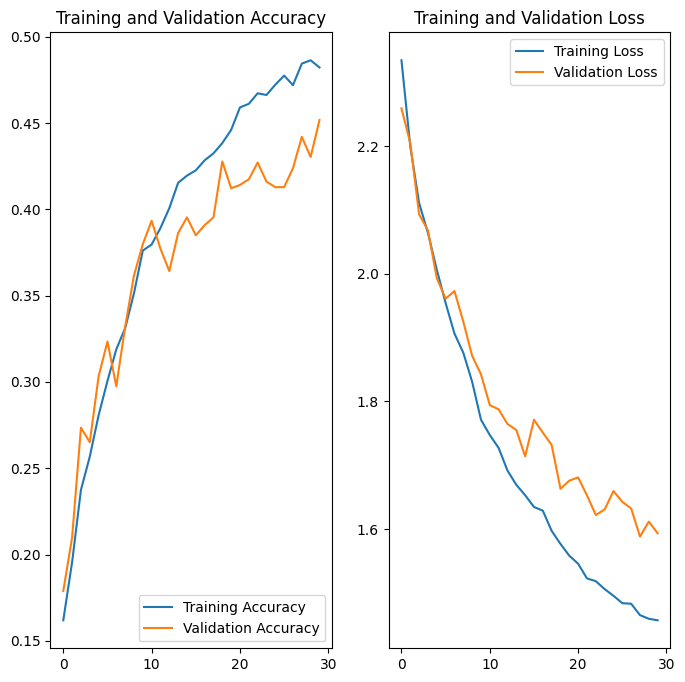

In [24]:
#with different drop rate
s=DeepLearning(epochs=30)
s.train(data_dir,valid_dir,isInception=False,isBatchNormalisation=False,isAugmentation=True,isResidual=False,droprate=0.2)